In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')

In [14]:
#explore data set
display(titanic.shape,titanic.tail(),titanic.head(10),titanic.columns,titanic.info(),titanic.describe().T)
display(titanic.isna().sum(),titanic.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


(891, 15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

None

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [6]:
titanic.groupby(['sex','class'])['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [7]:
titanic.groupby(['sex','class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [5]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [16]:

age = pd.cut(titanic['age'],[0,18,80])
display(age.head(20))
titanic.pivot_table('survived',['sex',age],'class')


0     (18.0, 80.0]
1     (18.0, 80.0]
2     (18.0, 80.0]
3     (18.0, 80.0]
4     (18.0, 80.0]
5              NaN
6     (18.0, 80.0]
7      (0.0, 18.0]
8     (18.0, 80.0]
9      (0.0, 18.0]
10     (0.0, 18.0]
11    (18.0, 80.0]
12    (18.0, 80.0]
13    (18.0, 80.0]
14     (0.0, 18.0]
15    (18.0, 80.0]
16     (0.0, 18.0]
17             NaN
18    (18.0, 80.0]
19             NaN
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

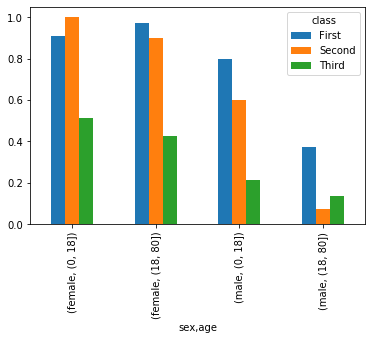

In [19]:
titanic.pivot_table('survived',index=['sex',age],columns='class').plot.bar();

In [24]:
titanic.groupby(['sex',age,'class'])['survived'].mean().unstack()

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [25]:
titanic.groupby(['sex',age,'class'])['survived'].mean()

sex     age       class 
female  (0, 18]   First     0.909091
                  Second    1.000000
                  Third     0.511628
        (18, 80]  First     0.972973
                  Second    0.900000
                  Third     0.423729
male    (0, 18]   First     0.800000
                  Second    0.600000
                  Third     0.215686
        (18, 80]  First     0.375000
                  Second    0.071429
                  Third     0.133663
Name: survived, dtype: float64

In [28]:
fare = pd.qcut(titanic['fare'],3)
fare
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 8.662]           (8.662, 26.0]                      \
class                     First     Third         First    Second     Third   
sex    age                                                                    
female (0, 18]              NaN  0.700000           NaN  1.000000  0.583333   
       (18, 80]             NaN  0.523810           1.0  0.877551  0.433333   
male   (0, 18]              NaN  0.166667           NaN  0.500000  0.500000   
       (18, 80]             0.0  0.127389           0.0  0.086957  0.102564   

fare            (26.0, 512.329]                   
class                     First Second     Third  
sex    age                                        
female (0, 18]         0.909091    1.0  0.111111  
       (18, 80]        0.972222    1.0  0.125000  
male   (0, 18]         0.800000    0.8  0.052632  
       (18, 80]        0.400000    0.0  0.500000

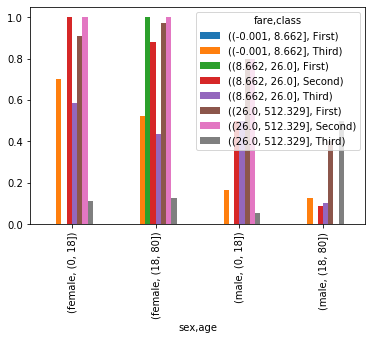

In [29]:
titanic.pivot_table('survived',index=['sex',age],columns=[fare,'class']).plot.bar();

In [33]:
titanic.pivot_table(index='sex',columns='class',
    aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [32]:
titanic.pivot_table('survived',index='sex',columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


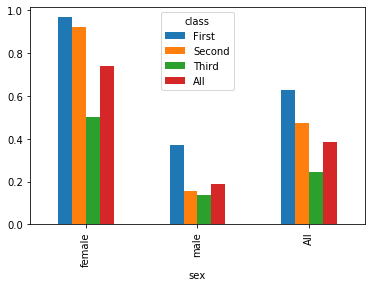

In [35]:
titanic.pivot_table('survived',index='sex',columns='class', margins=True).plot.bar();

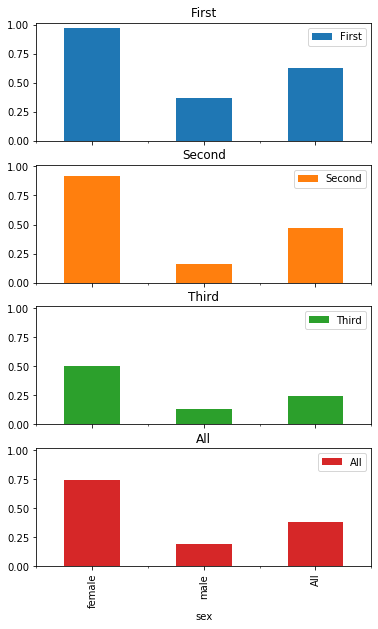

In [41]:
titanic.pivot_table('survived',index='sex',columns='class', margins=True).plot.bar(subplots=True,figsize=(6,10),sharey=True);